In [4]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [4]:
df = pd.read_excel("../Dataset/flood dataset.xlsx")
df.head()


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [5]:
df.head()


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temp         115 non-null    int64  
 1   Humidity     115 non-null    int64  
 2   Cloud Cover  115 non-null    int64  
 3   ANNUAL       115 non-null    float64
 4   Jan-Feb      115 non-null    float64
 5   Mar-May      115 non-null    float64
 6   Jun-Sep      115 non-null    float64
 7   Oct-Dec      115 non-null    float64
 8   avgjune      115 non-null    float64
 9   sub          115 non-null    float64
 10  flood        115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


In [7]:
df.describe()


,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [8]:
df.isnull().sum()


Temp           0
Humidity       0
Cloud Cover    0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
avgjune        0
sub            0
flood          0
dtype: int64

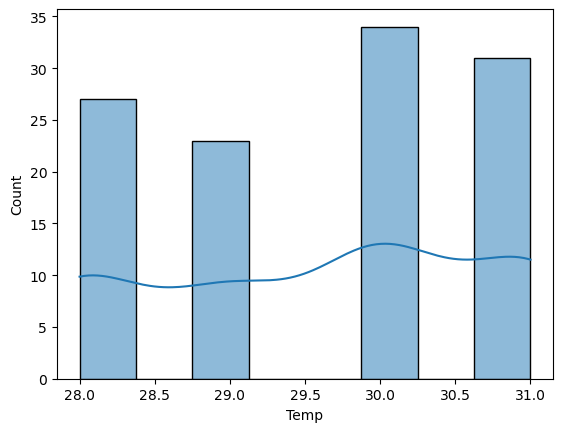

In [9]:
sns.histplot(df["Temp"], kde=True)
plt.show()


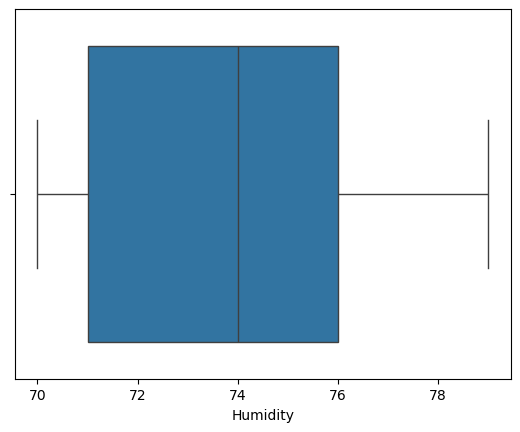

In [10]:
sns.boxplot(x=df["Humidity"])
plt.show()


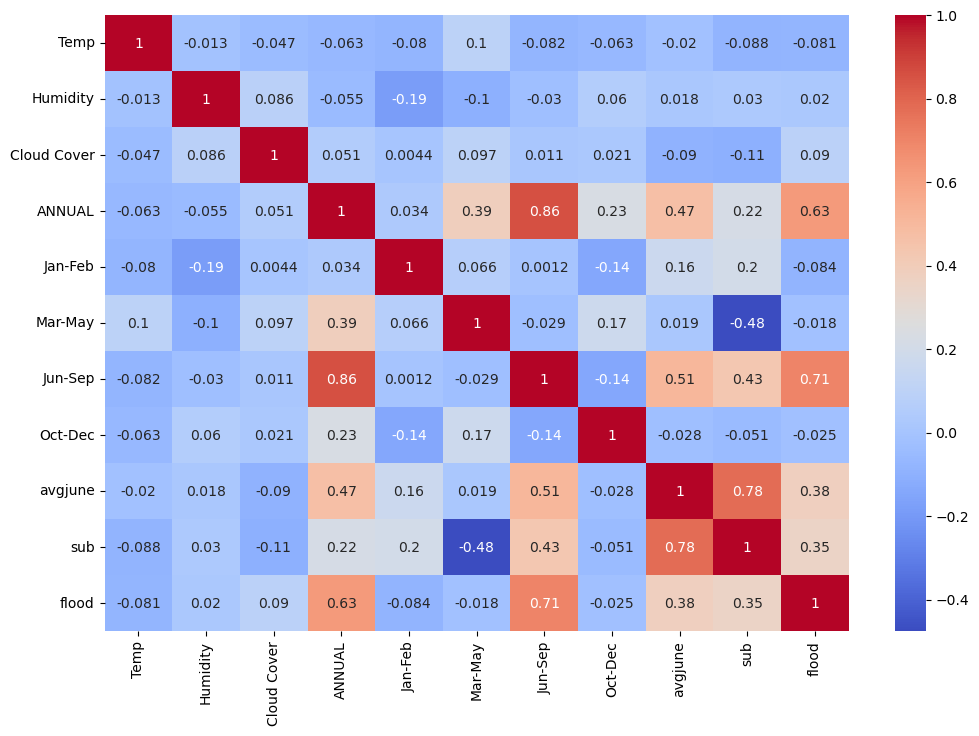

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


In [12]:
X = df.drop("flood", axis=1)
y = df["flood"]


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=10
)


In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [15]:
from joblib import dump

dump(sc, "../model/transform.save")


['../model/transform.save']

In [16]:
import pickle

pickle.dump(df.drop("flood", axis=1).columns,
            open("../model/columns.save", "wb"))


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [18]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [19]:
dtree = DecisionTreeClassifier(class_weight='balanced', random_state=42)

rf = RandomForestClassifier(class_weight='balanced', random_state=42)

knn = KNeighborsClassifier()

xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=99/16,
    random_state=42
)

In [20]:
dtree.fit(X_train, y_train)
rf.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgb.fit(X_train, y_train)


C:\Users\vadap\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:200: UserWarning: [12:15:20] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [21]:
p1 = dtree.predict(X_test)
p2 = rf.predict(X_test)
p3 = knn.predict(X_test)
p4 = xgb.predict(X_test)


In [22]:
from sklearn.metrics import accuracy_score

print("Decision Tree:", accuracy_score(y_test, p1))
print("Random Forest:", accuracy_score(y_test, p2))
print("KNN:", accuracy_score(y_test, p3))
print("XGBoost:", accuracy_score(y_test, p4))


Decision Tree: 0.9655172413793104
Random Forest: 0.9655172413793104
KNN: 0.9310344827586207
XGBoost: 0.9655172413793104


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import joblib

# Split features and target
X = df.drop("flood", axis=1)   # make sure target column name is correct
y = df["flood"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Create scaler
scaler = StandardScaler()

# Fit scaler on training data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create balanced Random Forest
rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train model
rf.fit(X_train_scaled, y_train)

# Save everything
joblib.dump(rf, "../model/floods.save")
joblib.dump(scaler, "../model/transform.save")
joblib.dump(X.columns, "../model/columns.save")

print("Model Saved Successfully ✅")

Model Saved Successfully ✅


In [26]:
# Predict again properly
p2 = rf.predict(X_test_scaled)

print("Length of y_test:", len(y_test))
print("Length of p2:", len(p2))

print(confusion_matrix(y_test, p2))
print(classification_report(y_test, p2))


Length of y_test: 23
Length of p2: 23
[[20  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [27]:
print(df.columns)


Index(['Temp', 'Humidity', 'Cloud Cover', 'ANNUAL', 'Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec', 'avgjune', 'sub', 'flood'],
      dtype='object')


In [28]:
print(df['flood'].value_counts())


flood
0    99
1    16
Name: count, dtype: int64


In [29]:
import os
print(os.getcwd())


E:\Flood_Prediction_Project\training


In [30]:
sample = X.iloc[0:1]   # take real flood sample
sample_scaled = scaler.transform(sample)

print("Prediction:", rf.predict(sample_scaled))


Prediction: [0]


In [31]:
print(y.iloc[0])


0


In [32]:
print("Predictions on test set:")
print(pd.Series(rf.predict(X_test_scaled)).value_counts())


Predictions on test set:
0    20
1     3
Name: count, dtype: int64


In [33]:
print(confusion_matrix(y_test, rf.predict(X_test_scaled)))
print(classification_report(y_test, rf.predict(X_test_scaled)))


[[20  0]
 [ 0  3]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00         3

    accuracy                           1.00        23
   macro avg       1.00      1.00      1.00        23
weighted avg       1.00      1.00      1.00        23



In [34]:
# Get one real flood row
flood_row = df[df['flood'] == 1].iloc[0]

print(flood_row)


Temp             28.0
Humidity         75.0
Cloud Cover      40.0
ANNUAL         3326.6
Jan-Feb           9.3
Mar-May         275.7
Jun-Sep        2403.4
Oct-Dec         638.2
avgjune         130.3
sub             256.4
flood             1.0
Name: 1, dtype: float64


In [35]:
print(X_test[(X_test == flood_row.drop('flood')).all(axis=1)])


Empty DataFrame
Columns: [Temp, Humidity, Cloud Cover, ANNUAL, Jan-Feb, Mar-May, Jun-Sep, Oct-Dec, avgjune, sub]
Index: []


In [36]:
manual = pd.DataFrame([[28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.3,256.4]],
                      columns=X.columns)

print("Prediction:", rf.predict(scaler.transform(manual)))


Prediction: [1]
